Credit fraud has been rampant in developing countries.Here we are going to create a model that tries to detect any fraud.

In [3]:
#Importing the dependancies

import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#loading the data
path = r"C:\Users\user\.vscode-py\data\creditcard.csv"
path
df= pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df= df.reset_index(drop=  True)

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
credit_data = df
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df= df.reset_index(drop=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
#information about the dataset.
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#check for any missing values in the dataset
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#check the distribution of the fraudulent and legit transations
credit_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
fraud = credit_data[credit_data.Class == 1]
legit = credit_data[credit_data.Class == 0]
fraud


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


This dataset is highly unbalanced.The number of legit transactions are way many as compared to the fraud transactions. We'll have to make it balanced.

In [14]:
#We get a sample of 492 from the legit dataset to match the 492 from the fraud dataset.
legit_sample = legit.sample(n=492)

Combine the fraud cases to the legit cases to make one dataset which we can use for our analysis.

In [15]:
#concatenate two datasets
new_dataset= pd.concat([legit_sample, fraud], axis= 0 )
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203827,134985.0,2.126075,-2.044163,-0.559310,-1.837771,-1.481020,0.817943,-1.990508,0.355518,-0.596901,...,-0.094732,-0.056030,0.182505,-0.418928,-0.507037,-0.220300,0.031374,-0.032617,91.82,0
81499,58958.0,-0.741481,0.885329,1.782151,1.306210,0.764386,0.068080,0.533339,0.317956,-1.338438,...,-0.037114,-0.372652,0.118500,-0.066489,-0.637225,-0.475357,0.109078,0.148740,7.96,0
70820,54032.0,-1.132183,0.856550,0.546465,1.030194,0.658562,0.839483,0.004103,0.745323,-0.486351,...,-0.028807,0.146284,0.018481,-1.153322,0.101341,-0.165520,0.204773,0.082452,8.88,0
57383,47888.0,-3.146488,2.900388,-0.605533,-0.158406,-1.651338,-0.525288,-1.220537,2.336218,-0.858846,...,-0.039664,-0.422923,0.290475,0.208428,0.017419,0.097379,0.090116,0.023532,13.91,0
197598,132089.0,2.024616,-1.844345,-1.077095,-1.554523,-1.333312,-0.275890,-1.127040,-0.044116,-1.338883,...,0.082249,0.417737,0.081469,0.757772,-0.168791,-0.094450,-0.020713,-0.034564,136.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [16]:
new_dataset.columns[0]

'Time'

Divide the dataset into X and Y values to create an equation.Y is the independent variable.The classification whether a case is fraud or legit in this case.

X becomes all the other dependent variables.


In [17]:
X= new_dataset.drop(columns=['Class','Time'], axis=1)
                    

Y= new_dataset['Class']

In [18]:
X.columns.tolist(
    
)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [19]:
X


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
203827,2.126075,-2.044163,-0.559310,-1.837771,-1.481020,0.817943,-1.990508,0.355518,-0.596901,1.674339,...,-0.281547,-0.094732,-0.056030,0.182505,-0.418928,-0.507037,-0.220300,0.031374,-0.032617,91.82
81499,-0.741481,0.885329,1.782151,1.306210,0.764386,0.068080,0.533339,0.317956,-1.338438,0.205650,...,-0.202024,-0.037114,-0.372652,0.118500,-0.066489,-0.637225,-0.475357,0.109078,0.148740,7.96
70820,-1.132183,0.856550,0.546465,1.030194,0.658562,0.839483,0.004103,0.745323,-0.486351,-0.016099,...,-0.017650,-0.028807,0.146284,0.018481,-1.153322,0.101341,-0.165520,0.204773,0.082452,8.88
57383,-3.146488,2.900388,-0.605533,-0.158406,-1.651338,-0.525288,-1.220537,2.336218,-0.858846,-0.099982,...,0.073615,-0.039664,-0.422923,0.290475,0.208428,0.017419,0.097379,0.090116,0.023532,13.91
197598,2.024616,-1.844345,-1.077095,-1.554523,-1.333312,-0.275890,-1.127040,-0.044116,-1.338883,1.704575,...,-0.195669,0.082249,0.417737,0.081469,0.757772,-0.168791,-0.094450,-0.020713,-0.034564,136.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [20]:
Y

203827    0
81499     0
70820     0
57383     0
197598    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

We split the data into two..The train data and the test data...using the train test split library in the scikitlearn.model_selection module.

In [21]:
#Split the data into training data and testing data
X_train, X_test, Y_train,Y_test = train_test_split(X,Y ,test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train,X_test)

(984, 29)                V1        V2         V3        V4         V5        V6  \
100623  -0.758469 -0.045410  -0.168438 -1.313275  -1.901763  0.739433   
219741  -0.288094  1.059287  -1.671928  0.923028  -0.153332 -0.378998   
141699  -0.979135  0.775767   0.563516 -1.193370  -0.685365  0.001799   
2874    -0.561359  0.894211   0.694692 -2.411402   0.677621 -0.696868   
187115   1.990016 -0.603964  -0.087481  0.233323  -0.659067  0.484143   
...           ...       ...        ...       ...        ...       ...   
110522   1.077388 -1.020185   0.217726 -0.502730  -1.252711 -1.018395   
225625  -0.312341 -1.059491  -0.155520 -1.808454   0.736227 -0.390442   
223618  -2.006582  3.676577  -5.463811  7.232058  -1.627859 -0.996755   
43061  -15.020981  8.075240 -16.298091  5.664820 -11.918153 -4.246957   
218287   2.154940 -0.955676  -0.405942 -1.022455  -1.009210 -0.249008   

               V7        V8        V9        V10  ...       V20       V21  \
100623   3.071892 -0.483422  0.61820

Lets see the shape in each division
I.e : Number of values in the x_test,y_test, x_train and the y_train

In [22]:
X_test.shape

(197, 29)

In [23]:
X_train.shape

(787, 29)

We are required to standardize or normalize the data.
Here we transform the data to have a mean of 1 and a standard deviation of 1.

In [24]:
scaler=  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Lets find out the imbalanceness of our data.
We see that the percentage of the Y values are fraudulent and legit cases.

In [25]:
pd.Series(Y_train.value_counts(normalize=True))

Class
1    0.500635
0    0.499365
Name: proportion, dtype: float64

Now we are gonna make the model. We are gonna make the model using Random Forest.
We are gonna make classifications to make sure our model works perfectly.
We are gonna build 100 trees.the more the trees teh accurate our results.
We are gonna have a max depth of 10.These prevents over fitting by not making the trees not making them too deep, or too specific to the training data.
The minimum split is gonna prevent he trees from growing too complex by forcing splits to happen.
The random state ensures we get the same results every time we run the model.

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth= 10,
    min_samples_split=5,
    random_state=2
)

Here we evaluate  how well your model  is likely to perform  to unseen data.

In [27]:
cv_scores = cross_val_score(rf_model, X_train_scaled, Y_train, cv=5, scoring='f1')
print("\nCross-Validation F1 scores:",cv_scores)
print("Average F1 score :",np.mean(cv_scores))


Cross-Validation F1 scores: [0.95364238 0.93421053 0.91034483 0.92993631 0.93670886]
Average F1 score : 0.9329685808999868


This model performs consistently well across different subset of the data.Because of the 94% F1 score.

In [28]:
rf_model.fit(X_train_scaled,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=2)

In [29]:
y_pred = rf_model.predict(X_test_scaled)

In [30]:
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



Precision = Of all the positive, how many are truly positive?
Recall = Of all actual positives, how many did the model correctly identify?
F1-score = Harmonic mean of precision and recall — a balanced performance measure.
Support = Number of actual occurrences of the class in Y_test.

In fraud detection, accuracy is often misleading because fraud is rare. Focus more on:
Recall for class 1 (fraud) → How many fraudulent transactions you caught
Precision for class 1 → How many predicted frauds were truly fraud

Confusion matrix is used to classification model any predicted values with the true labels. 

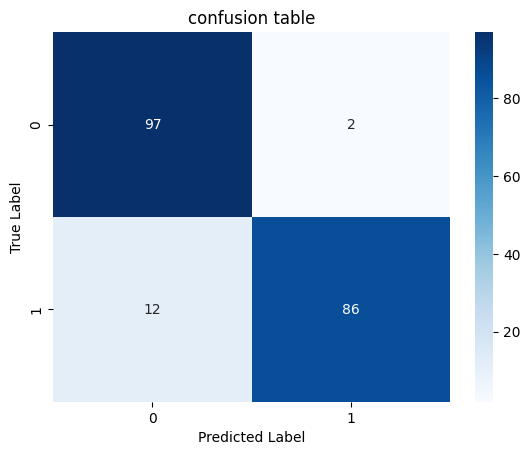

In [31]:
plt.Figure(figsize=(10,8))
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm , annot= True, fmt='d', cmap='Blues')
plt.title("confusion table")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Feature importance tells you how much each feature (column) in your dataset contributes to the predictions made by the model.

In [32]:
importance= rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature':X.columns,
    'Importance':importance
}).sort_values('Importance',ascending=False)

In [34]:
feature_imp['Importance']= feature_imp['Importance'].round(4)
feature_imp

,Feature,Importance
13,V14,0.2210
9,V10,0.1275
3,V4,0.1134
16,V17,0.0990
11,V12,0.0721
10,V11,0.0706
2,V3,0.0436
6,V7,0.0349
15,V16,0.0307
8,V9,0.0251


Now we can plot the values.

<function matplotlib.pyplot.show(close=None, block=None)>

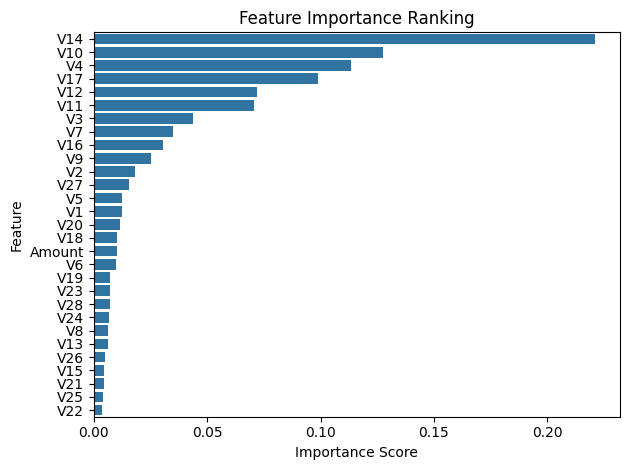

In [35]:
plt.Figure(figsize=(10,8))
sns.barplot(data=feature_imp, x= 'Importance', y = 'Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show

Now we can make a correlation matrix graph.

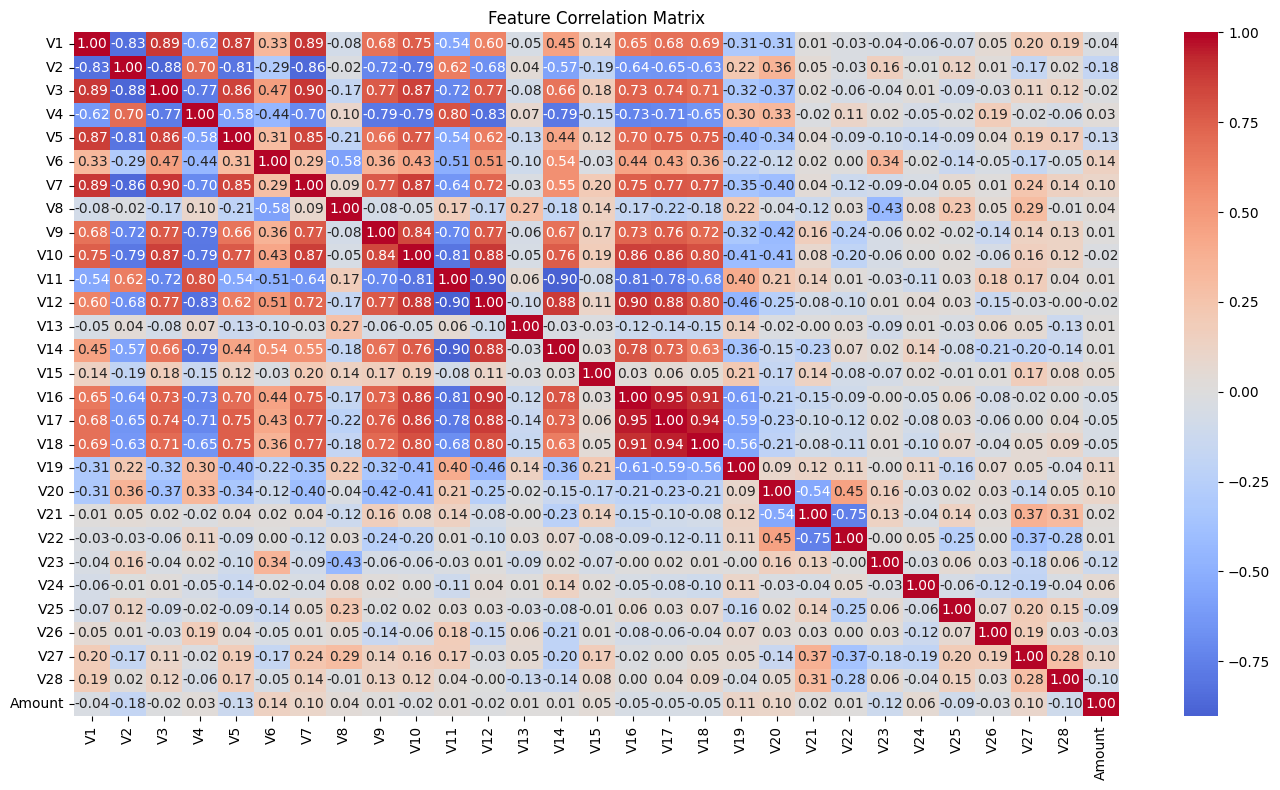

In [94]:
plt.figure(figsize=(14,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap= 'coolwarm', center = 0 , annot = True , fmt = '.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

We can calculate the probability of either happening
We calculate proportions of legit transactions flagged wrongly as fraud and the vice versa at different probability thresholds 
Then we measure the model's ability to separate classes.

In [37]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc= auc(fpr,tpr)

In [38]:
roc_auc

np.float64(0.9781488352916924)

In [39]:
y_pred_proba

array([1.        , 0.01343961, 0.15645398, 0.05566429, 1.        ,
       0.07091317, 0.87405952, 1.        , 0.31193425, 1.        ,
       0.04610617, 1.        , 1.        , 0.02538405, 0.09028645,
       1.        , 0.05961435, 0.84850538, 0.00451865, 0.06726977,
       0.23534645, 0.0087746 , 0.27844299, 0.99291667, 0.04839765,
       1.        , 1.        , 0.23887002, 1.        , 0.22371426,
       0.5273395 , 1.        , 0.11680139, 0.955     , 1.        ,
       0.04960307, 0.06882445, 0.32816393, 0.32769803, 0.99666667,
       0.96333333, 0.00980265, 0.04742205, 1.        , 1.        ,
       0.95333333, 0.99333333, 1.        , 0.1173959 , 0.0438054 ,
       0.03985179, 0.01902329, 0.00731063, 0.01527685, 0.00533959,
       0.22522869, 0.09822336, 1.        , 0.27154943, 0.00463938,
       1.        , 1.        , 1.        , 0.95419048, 1.        ,
       0.0099808 , 1.        , 0.04858253, 0.27665817, 0.97333333,
       0.49374469, 0.09290779, 0.0223111 , 0.00408413, 1.     

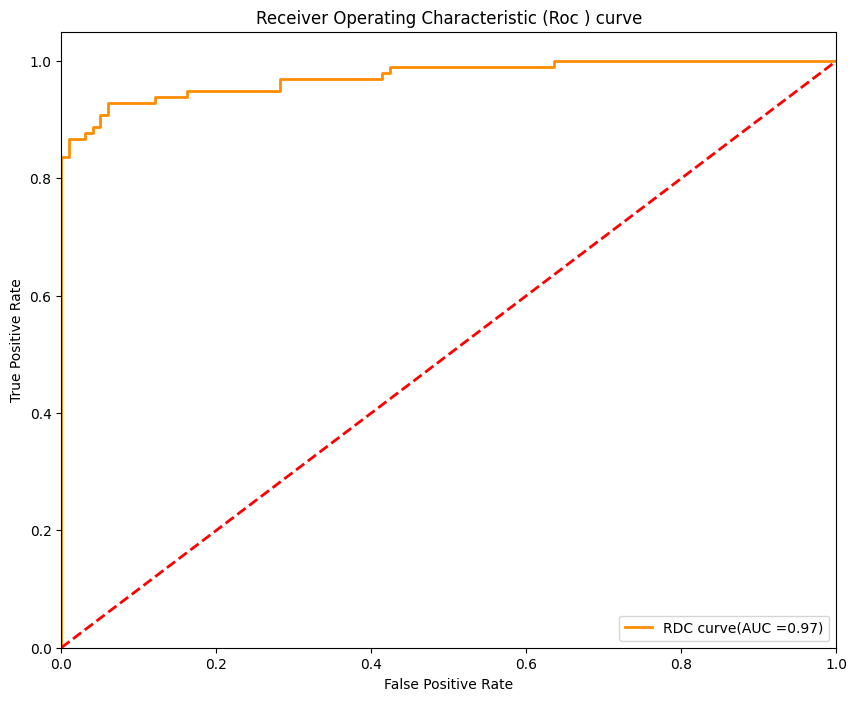

In [101]:
plt.figure(figsize = (10,8))
plt.plot(fpr,tpr, color ='darkorange', lw= 2, label =f'RDC curve(AUC ={roc_auc:.2f})')
plt.plot([0,1],[0.,1], color ='red', lw=2, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (Roc ) curve")
plt.legend(loc = "lower right")
plt.show()